In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
mall=pd.read_csv("C:\\Users\\Raj Aryan\\Downloads\\Mall_Customers.csv")
mall

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
mall.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
mall.shape

(200, 5)

In [5]:
mall.info()    #all the columns have the required data type having non-null values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
mall.describe()        #25% of customers fall in the age of 28, 50% are 36 and 75% are 49.

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
mall_d= mall.copy()
mall_d.drop_duplicates(subset=None,inplace=True)      #subset refers to columns under which the operation has to be done.

In [8]:
mall_d.shape

(200, 5)

In [9]:
mall.shape

(200, 5)

<AxesSubplot: >

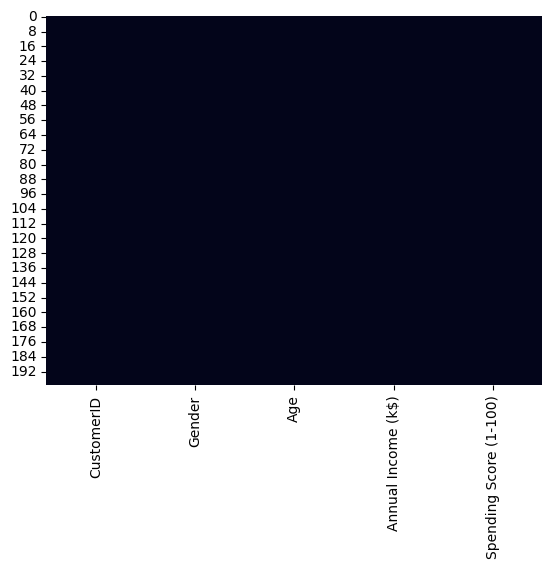

In [10]:
sns.heatmap(mall.isnull(), cbar=False)

The shape after running the drop duplicate command is same as the original dataframe. Hence, conclude that there were no duplicate values in the dataset

In [11]:
 #Null percentage: Columns
(mall.isnull().sum() * 100 / len(mall)).value_counts(ascending=False)    

0.0    5
dtype: int64

In [12]:
#Null count: Columns
mall.isnull().sum()        

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [13]:
#Null percentage: Rows
(mall.isnull().sum(axis=1) * 100 / len(mall)).value_counts(ascending=False)    

0.0    200
dtype: int64

In [14]:
#Null count: Rows
mall.isnull().sum(axis=1).value_counts(ascending=False)           

0    200
dtype: int64

Hence,there are no missing / Null values either in columns or rows

# Exploratory Data Analytics

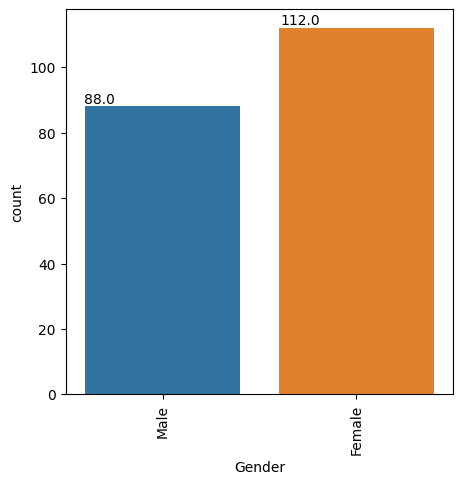

In [15]:
#Univariate Analysis

#Gender
plt.figure(figsize = (5,5))
gender = mall['Gender'].sort_values(ascending = False)
ax = sns.countplot(x='Gender', data= mall)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation=90)
plt.show()

Data is not balanced, 27% more Females have participated than males

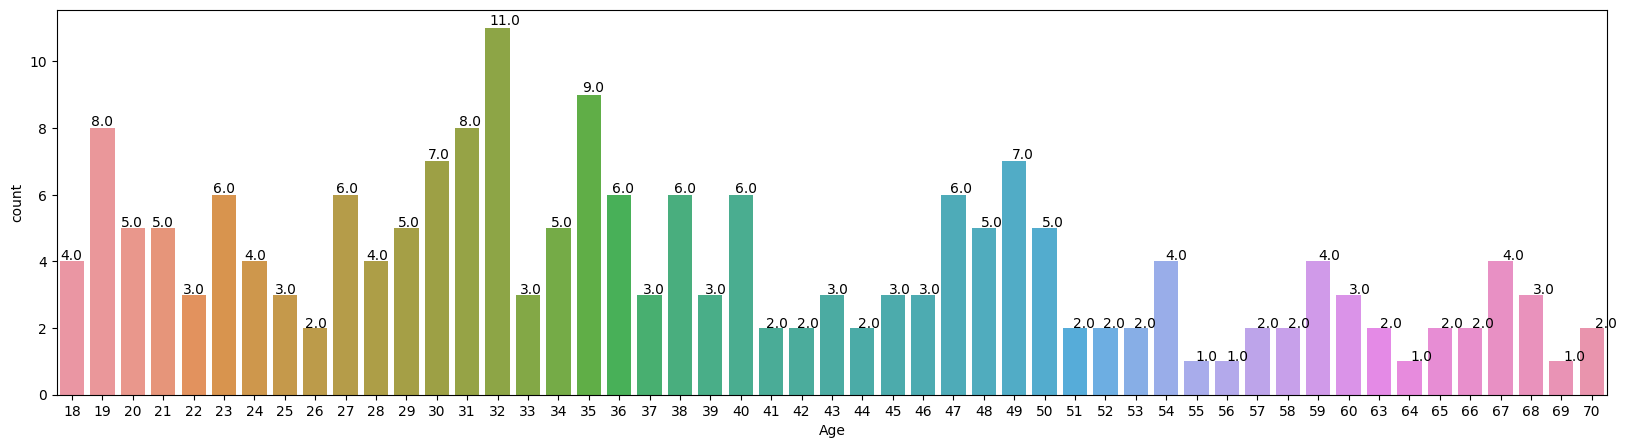

In [16]:
#Age

plt.figure(figsize = (20,5))
gender = mall['Age'].sort_values(ascending = False)
ax = sns.countplot(x='Age', data= mall)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))

plt.show()

Audience are from Age 18 to 70

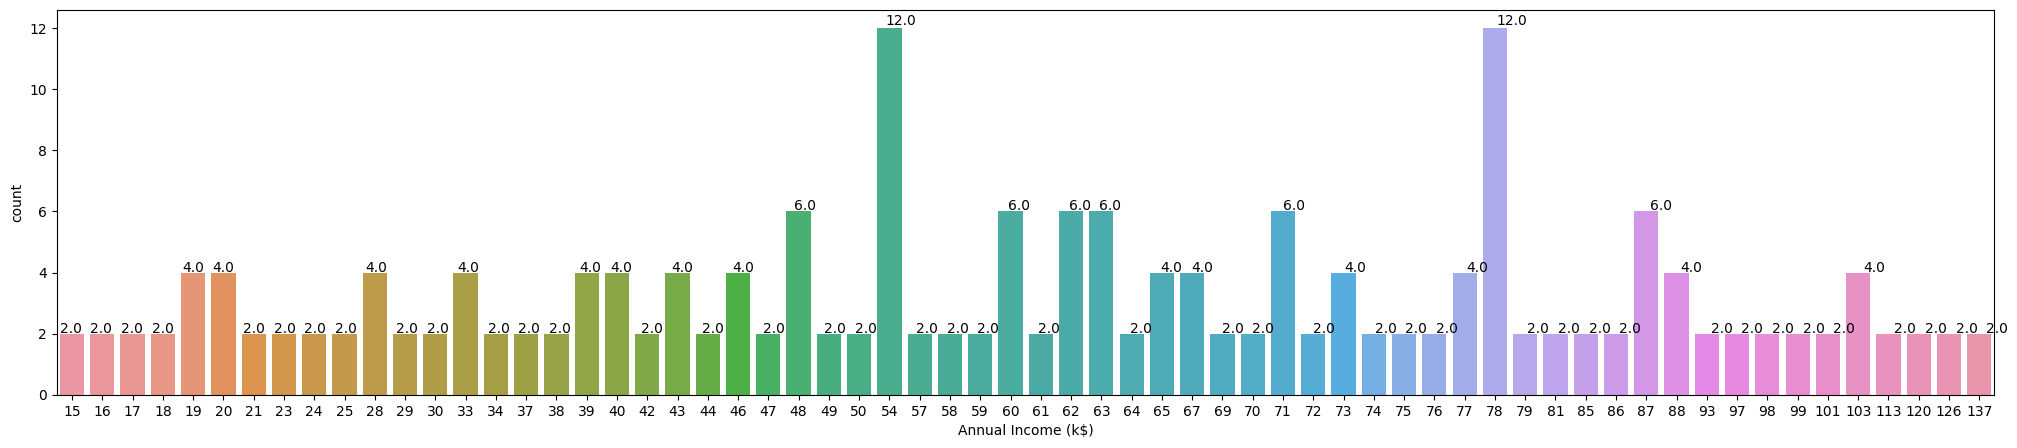

In [17]:
#Annual Income (k$)

plt.figure(figsize = (25,5))
gender = mall['Annual Income (k$)'].sort_values(ascending = False)
ax = sns.countplot(x='Annual Income (k$)', data= mall)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))

plt.show()

Audience are from Annual Income(k$) range between 15 to 137

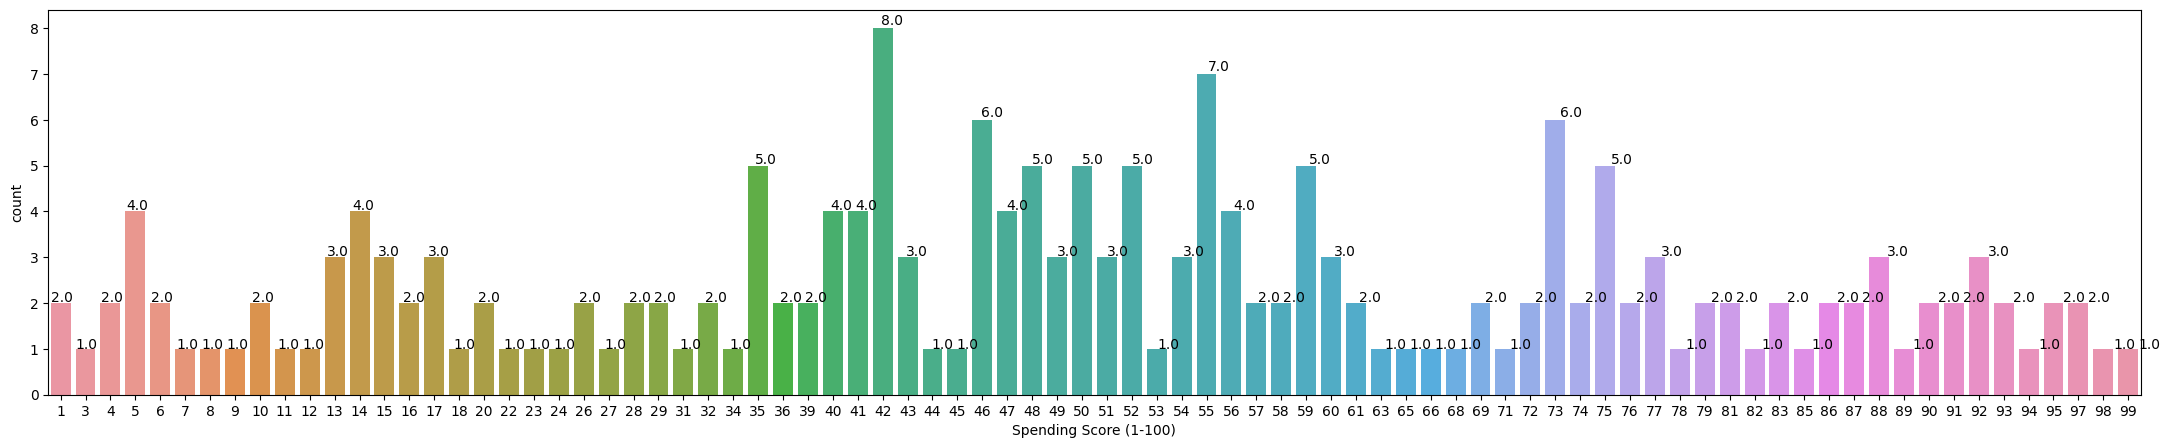

In [18]:
#Spending Score (1-100)
plt.figure(figsize = (27,5))
gender = mall['Spending Score (1-100)'].sort_values(ascending = False)
ax = sns.countplot(x='Spending Score (1-100)', data= mall)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))

plt.show()


Audience are having Spending Score (1-100) between 1 to 99

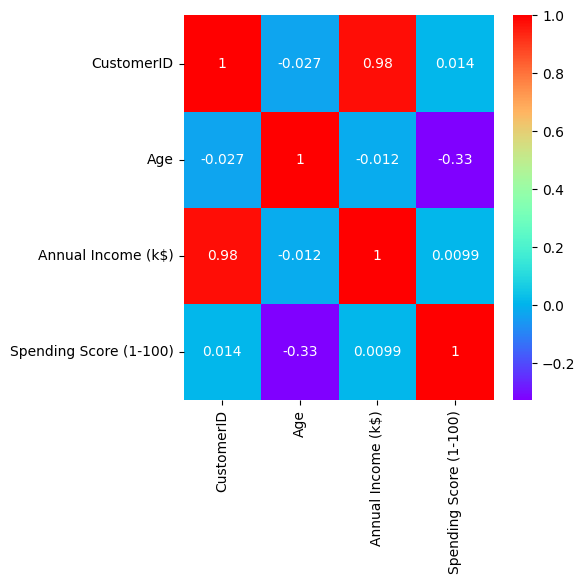

In [19]:
# To check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (5,5))
sns.heatmap(mall.corr(), annot = True, cmap="rainbow")
plt.savefig('Correlation')
plt.show()

Age and Spending Score (1-100) are moderately correlated with correlation of -0.33 showing that age is inversely proportional to spending score.

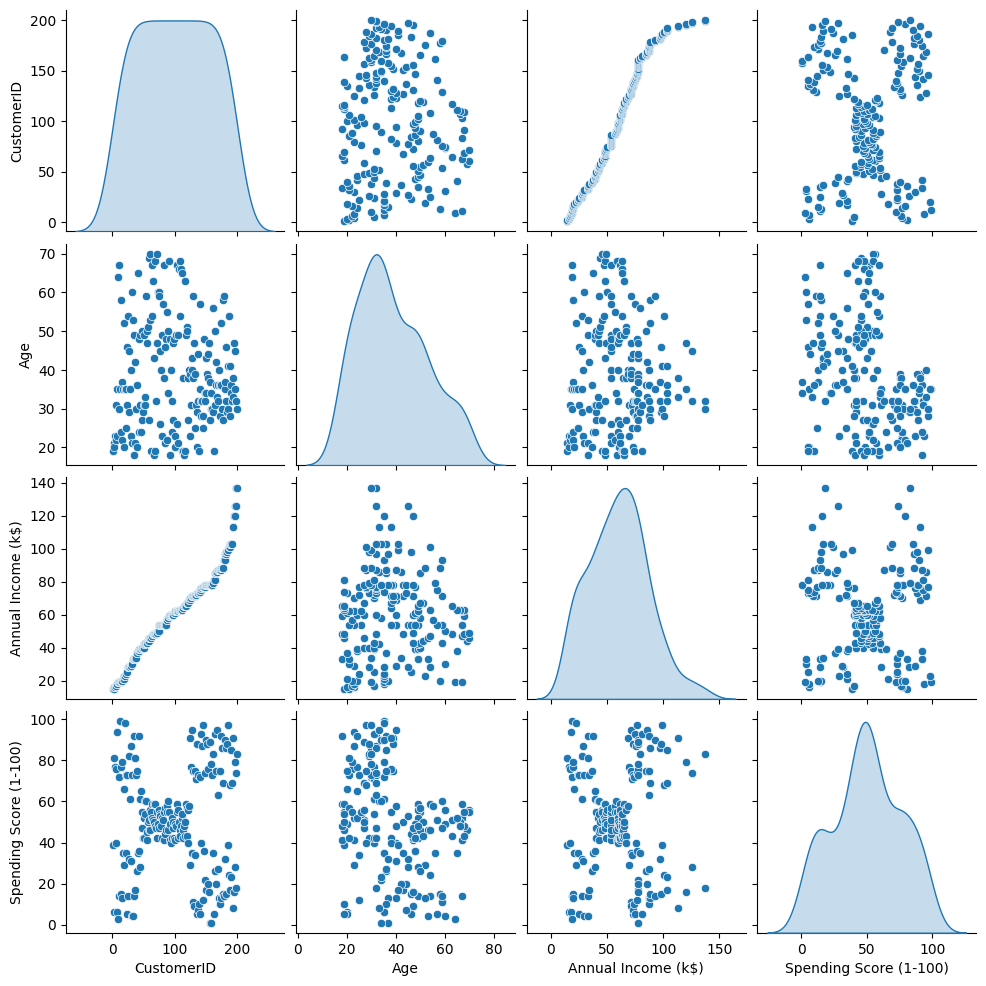

In [20]:
sns.pairplot(mall,corner=False,diag_kind="kde")
plt.show()

# Outlier Analysis

In [21]:
#Data before Outlier Treatment 
mall.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


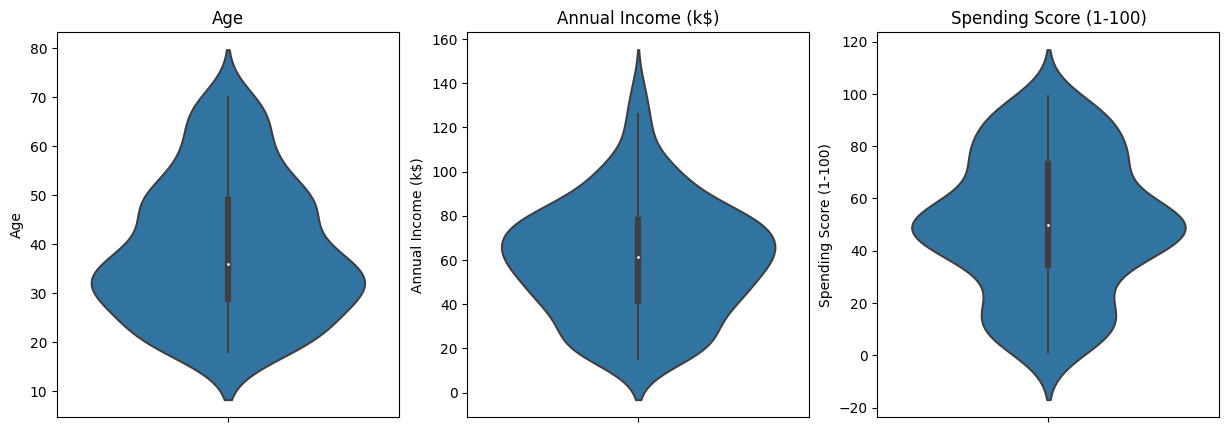

In [22]:
f, axes = plt.subplots(1,3, figsize=(15,5))
s=sns.violinplot(y=mall.Age,ax=axes[0])
axes[0].set_title('Age')
s=sns.violinplot(y=mall['Annual Income (k$)'],ax=axes[1])
axes[1].set_title('Annual Income (k$)')
s=sns.violinplot(y=mall['Spending Score (1-100)'],ax=axes[2])
axes[2].set_title('Spending Score (1-100)')
plt.show()

There is an outlier in Annual Income (k$) field but Income & Spending Score(1-100) has no outliers

In [23]:
#Winsorization Method or Percentile Capping
#If any value exceeds the value of the 99th percentile or is below the 1st percentile then they are treated as outliers.
Q3 = mall['Annual Income (k$)'].quantile(0.99)
Q1 = mall['Annual Income (k$)'].quantile(0.01)
mall['Annual Income (k$)'][mall['Annual Income (k$)']<=Q1]=Q1
mall['Annual Income (k$)'][mall['Annual Income (k$)']>=Q3]=Q3

In [24]:
#Data after outlier treatment
mall.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.461000,50.200000
std,57.879185,13.969007,25.949731,25.823522
min,1.000000,18.000000,15.990000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,126.110000,99.000000


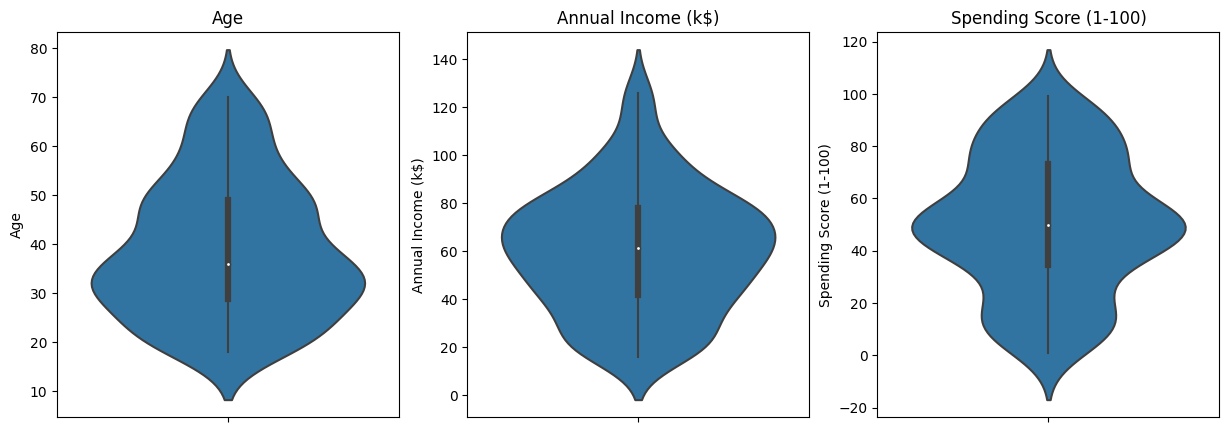

In [25]:
f, axes = plt.subplots(1,3, figsize=(15,5))
s=sns.violinplot(y=mall.Age,ax=axes[0])
axes[0].set_title('Age')
s=sns.violinplot(y=mall['Annual Income (k$)'],ax=axes[1])
axes[1].set_title('Annual Income (k$)')
s=sns.violinplot(y=mall['Spending Score (1-100)'],ax=axes[2])
axes[2].set_title('Spending Score (1-100)')
plt.show()

In [26]:
# Dropping CustomerID,Gender field to form cluster

mall_c = mall.drop(['CustomerID','Gender'],axis=1,inplace=True)

In [27]:
mall.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15.99,39
1,21,15.99,81
2,20,16.00,6
3,23,16.00,77
4,31,17.00,40


Rescaling the Features
There are two common ways of rescaling:

* Min-Max scaling
* Standardisation (mean-0, sigma-1)

Here, we will use Standardisation Scaling.

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
#Standarisation technique for scaling
scaler = StandardScaler()
mall_scaled = scaler.fit_transform(mall)
mall_scaled

array([[-1.42456879, -1.71803692, -0.43480148],
       [-1.28103541, -1.71803692,  1.19570407],
       [-1.3528021 , -1.7176506 , -1.71591298],
       [-1.13750203, -1.7176506 ,  1.04041783],
       [-0.56336851, -1.67901785, -0.39597992],
       [-1.20926872, -1.67901785,  1.00159627],
       [-0.27630176, -1.6403851 , -1.71591298],
       [-1.13750203, -1.6403851 ,  1.70038436],
       [ 1.80493225, -1.60175235, -1.83237767],
       [-0.6351352 , -1.60175235,  0.84631002],
       [ 2.02023231, -1.60175235, -1.4053405 ],
       [-0.27630176, -1.60175235,  1.89449216],
       [ 1.37433211, -1.5631196 , -1.36651894],
       [-1.06573534, -1.5631196 ,  1.04041783],
       [-0.13276838, -1.5631196 , -1.44416206],
       [-1.20926872, -1.5631196 ,  1.11806095],
       [-0.27630176, -1.52448686, -0.59008772],
       [-1.3528021 , -1.52448686,  0.61338066],
       [ 0.94373197, -1.44722136, -0.82301709],
       [-0.27630176, -1.44722136,  1.8556706 ],
       [-0.27630176, -1.40858861, -0.590

In [30]:
mall_df1 = pd.DataFrame(mall_scaled, columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
mall_df1.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.718037,-0.434801
1,-1.281035,-1.718037,1.195704
2,-1.352802,-1.717651,-1.715913
3,-1.137502,-1.717651,1.040418
4,-0.563369,-1.679018,-0.395980


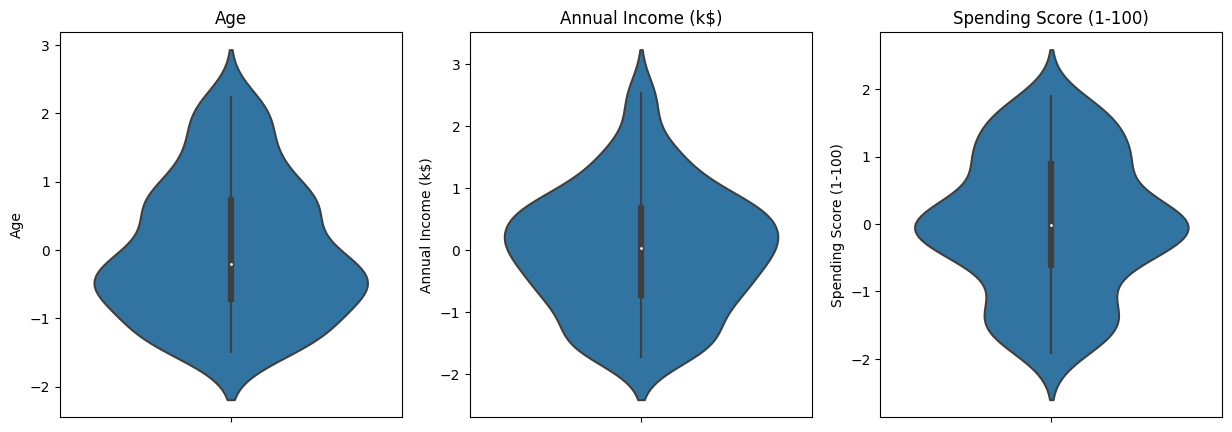

In [31]:
f, axes = plt.subplots(1,3, figsize=(15,5))
s=sns.violinplot(y=mall_df1.Age,ax=axes[0])
axes[0].set_title('Age')
s=sns.violinplot(y=mall_df1['Annual Income (k$)'],ax=axes[1])
axes[1].set_title('Annual Income (k$)')
s=sns.violinplot(y=mall_df1['Spending Score (1-100)'],ax=axes[2])
axes[2].set_title('Spending Score (1-100)')
plt.show()

The above three violinplot showing that the data got normalised as all are showing bel shaped structure.

# Model Building

K- means Clustering
K-means clustering is one of the simplest and popular unsupervised machine learning algorithms.

The algorithm works as follows:

First we initialize k points, called means, randomly. We categorize each item to its closest mean and we update the mean’s coordinates, which are the averages of the items categorized in that mean so far. We repeat the process for a given number of iterations and at the end, we have our clusters.

Finding the Optimal Number of Clusters
Elbow Curve to get the right number of Clusters

A fundamental step for any unsupervised algorithm is to determine the optimal number of clusters into which the data may be clustered. The Elbow Method is one of the most popular methods to determine this optimal value of k.

In [32]:
from sklearn.cluster import KMeans

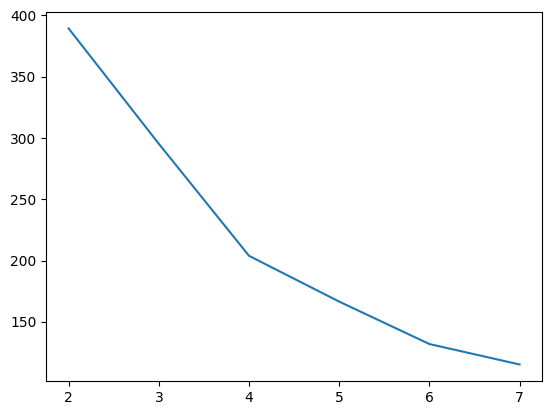

In [33]:
# Elbow curve method to find the ideal number of clusters.
clusters=list(range(2,8))
ssd = []
for num_clusters in clusters:
    model_clus = KMeans(n_clusters = num_clusters, max_iter=150,random_state= 50)
    model_clus.fit(mall_df1)
    ssd.append(model_clus.inertia_)

plt.plot(clusters,ssd)

Looking at the above elbow curve it looks good to proceed with 4 clusters.

In [34]:
#K-means with k=4 clusters

cluster = KMeans(n_clusters=4, max_iter=150, random_state= 50)
cluster.fit(mall_df1)

KMeans(max_iter=150, n_clusters=4, random_state=50)

In [35]:
# Cluster labels

cluster.labels_

array([1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1,
       2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1,
       1, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2,
       2, 1, 0, 1, 1, 1, 2, 2, 2, 2, 1, 0, 3, 3, 0, 3, 0, 3, 2, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 2, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3])

In [36]:
from sklearn.metrics import silhouette_score

In [37]:
silhouette_score(mall_df1,cluster.labels_)

0.40563383549747967

In [38]:
# Assign the label

mall_d['Cluster_Id'] = cluster.labels_
mall_d.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster_Id
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,1
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1


In [39]:
## Number of customers in each cluster
mall_d['Cluster_Id'].value_counts(ascending=True)

0    38
3    40
1    57
2    65
Name: Cluster_Id, dtype: int64

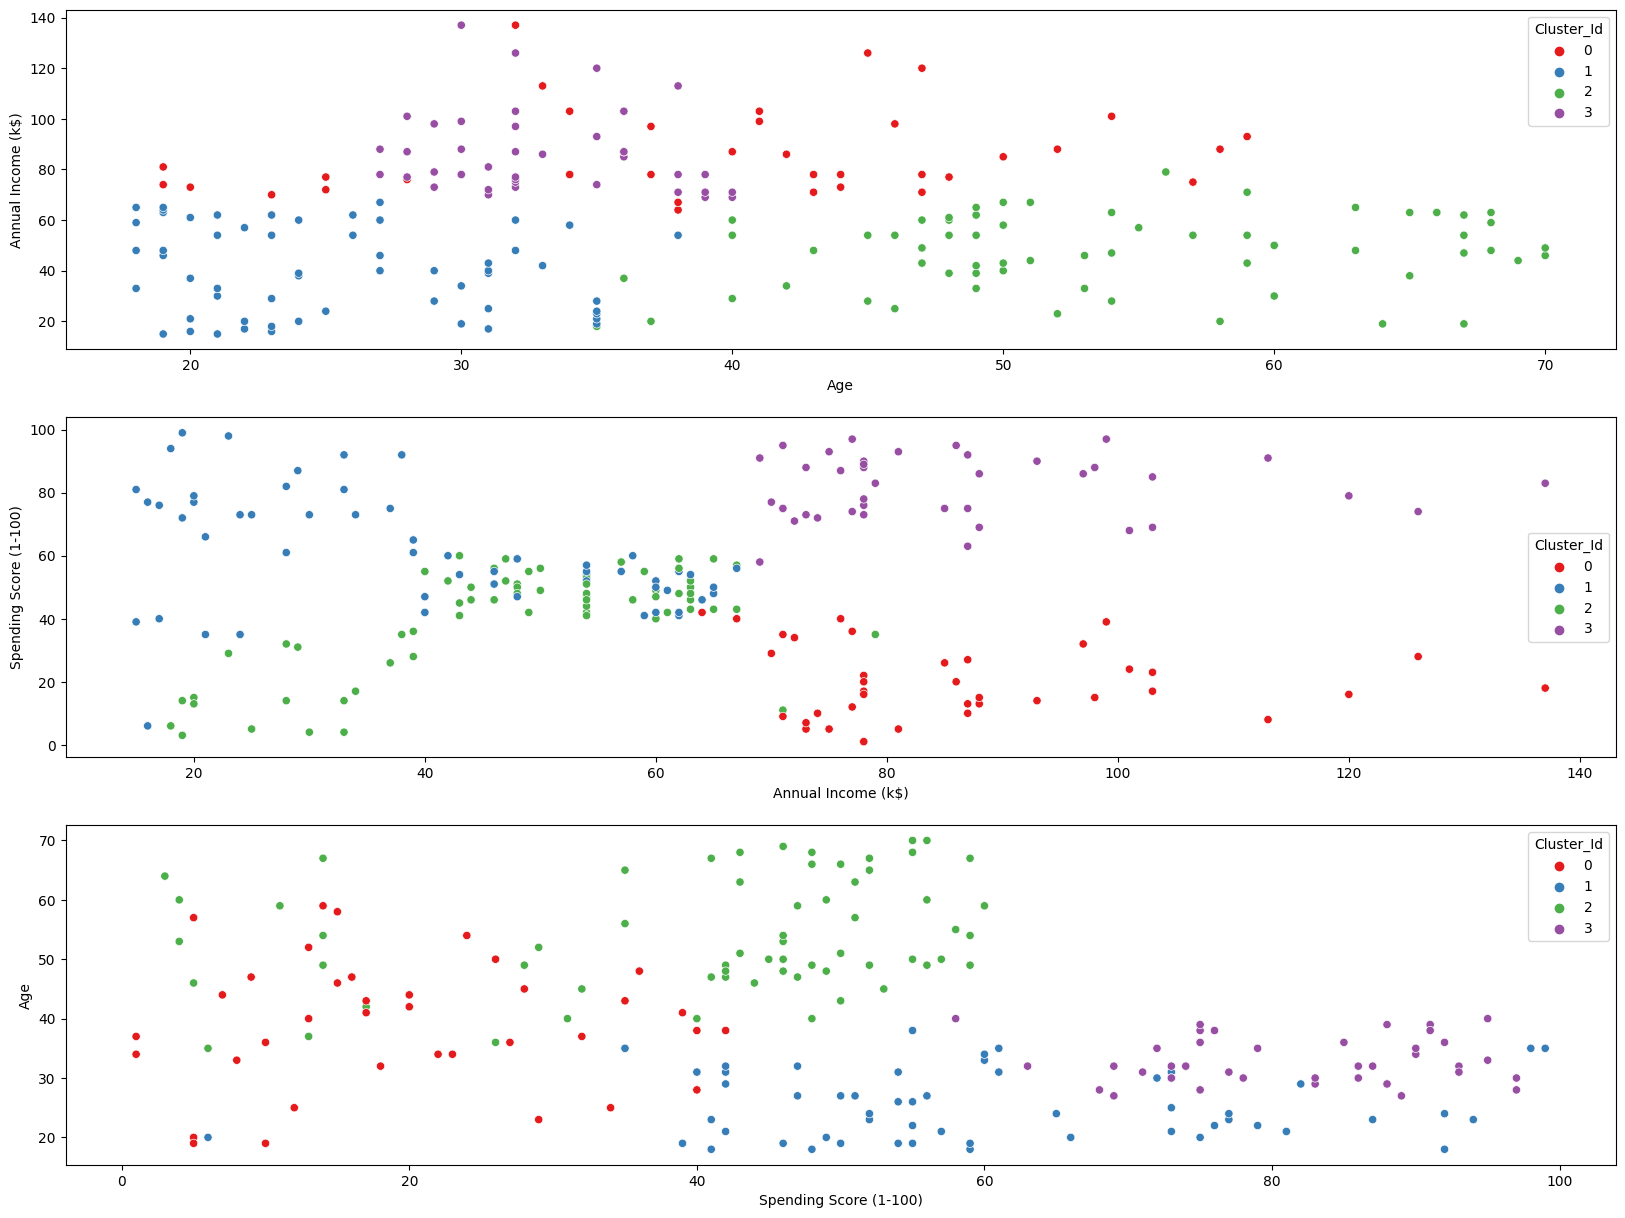

In [40]:
plt.figure(figsize = (20,15))
plt.subplot(3,1,1)
sns.scatterplot(x = 'Age', y = 'Annual Income (k$)',hue='Cluster_Id',data = mall_d,legend='full',palette="Set1")
plt.subplot(3,1,2)
sns.scatterplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)',hue='Cluster_Id', data = mall_d,legend='full',palette="Set1")
plt.subplot(3,1,3)
sns.scatterplot(x = 'Spending Score (1-100)', y = 'Age',hue='Cluster_Id',data= mall_d,legend='full',palette="Set1")
plt.show()

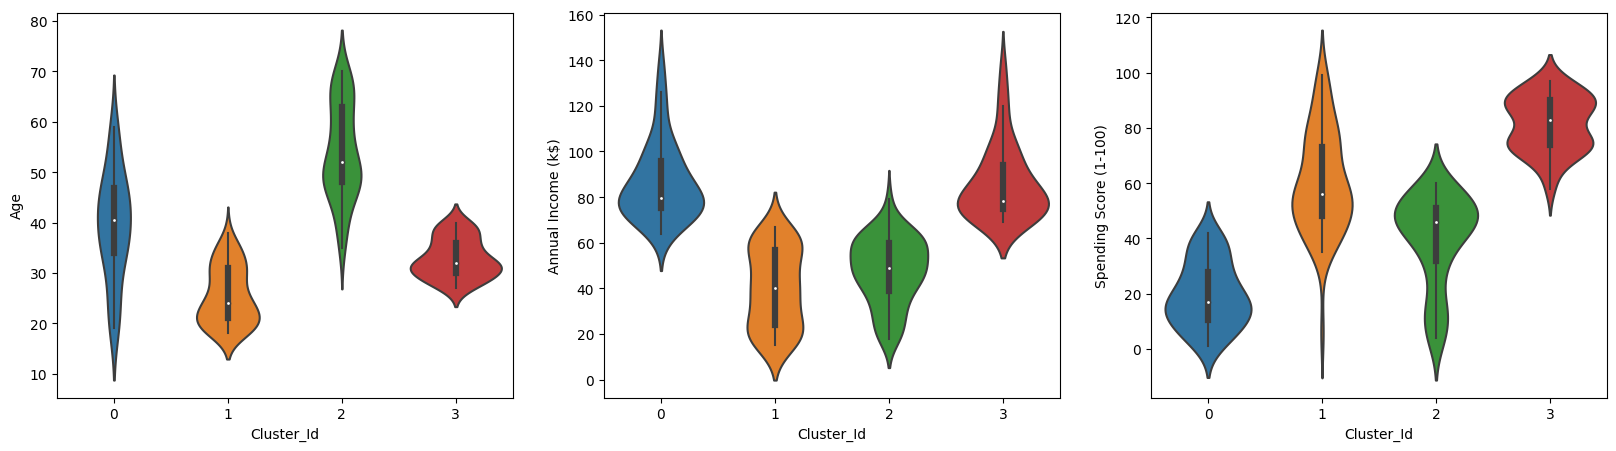

In [41]:
#Violin plot on Original attributes to visualize the spread of the data

fig, axes = plt.subplots(1,3, figsize=(20,5))

sns.violinplot(x = 'Cluster_Id', y = 'Age', data = mall_d,ax=axes[0])
sns.violinplot(x = 'Cluster_Id', y = 'Annual Income (k$)', data = mall_d,ax=axes[1])
sns.violinplot(x = 'Cluster_Id', y = 'Spending Score (1-100)', data=mall_d,ax=axes[2])
plt.show()

In [42]:
mall_d.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster_Id
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,1
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1


In [43]:
mall_d[['Age', 'Annual Income (k$)','Spending Score (1-100)','Cluster_Id']].groupby('Cluster_Id').mean()

,Age,Annual Income (k$),Spending Score (1-100)
Cluster_Id,,,
0,39.368421,86.500000,19.578947
1,25.438596,40.000000,60.298246
2,53.984615,47.707692,39.969231
3,32.875000,86.100000,81.525000


Cluster 0 are those people whose

* Avg Age : 40
* Avg Annual Income (k$) : 86.5k
* Avg Spending Score (1-100) : 20

In [44]:
group_0= mall_d[mall_d['Cluster_Id']==0]
group_0.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster_Id
112,113,Female,38,64,42,0
121,122,Female,38,67,40,0
124,125,Female,23,70,29,0
126,127,Male,43,71,35,0
130,131,Male,47,71,9,0


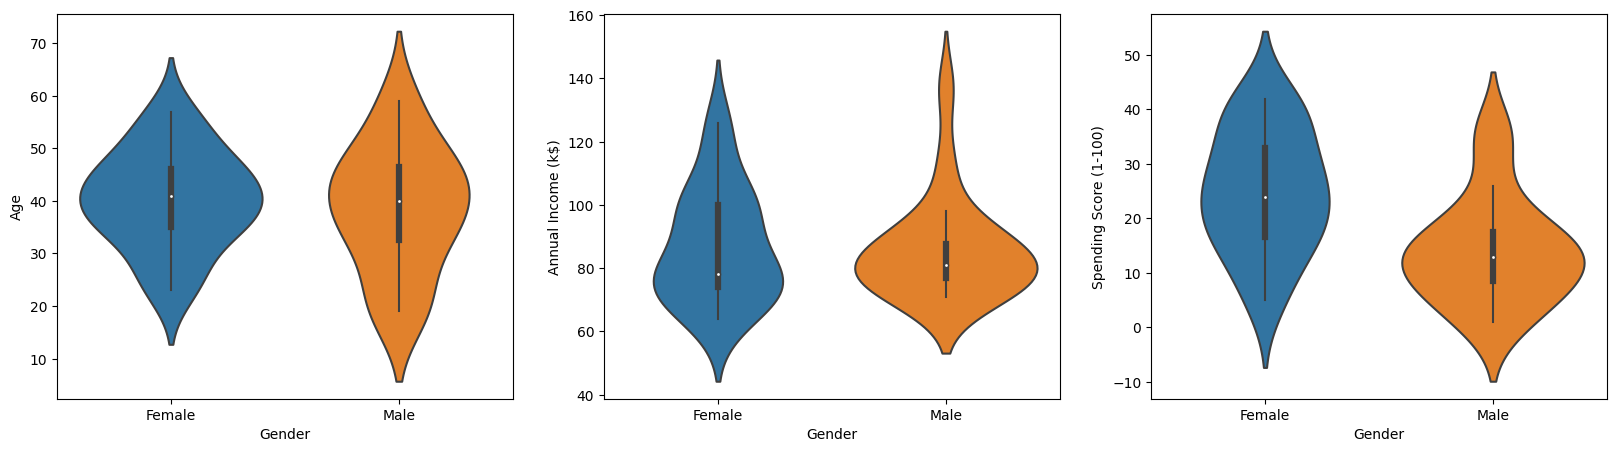

In [45]:
fig, axes = plt.subplots(1,3, figsize=(20,5))

sns.violinplot(x = 'Gender', y = 'Age', data = group_0,ax=axes[0])
sns.violinplot(x = 'Gender', y = 'Annual Income (k$)', data = group_0,ax=axes[1])
sns.violinplot(x = 'Gender', y = 'Spending Score (1-100)', data=group_0,ax=axes[2])
plt.show()

Interpretation:

*	Median age of this cluster is the same for both males and females.
*	Annual Income range for males is lower than for females.
*	Median Spending Score is more for females

In [46]:
mall_d[['Age', 'Annual Income (k$)','Spending Score (1-100)','Cluster_Id']].groupby('Cluster_Id').mean()

,Age,Annual Income (k$),Spending Score (1-100)
Cluster_Id,,,
0,39.368421,86.500000,19.578947
1,25.438596,40.000000,60.298246
2,53.984615,47.707692,39.969231
3,32.875000,86.100000,81.525000


Cluster 1 are those people whose

* Avg Age : 25
* Avg Annual Income (k$) : 40 k
* Avg Spending Score (1-100) : 60

In [47]:
group_1= mall_d[mall_d['Cluster_Id']==1]
group_1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster_Id
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,1
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1


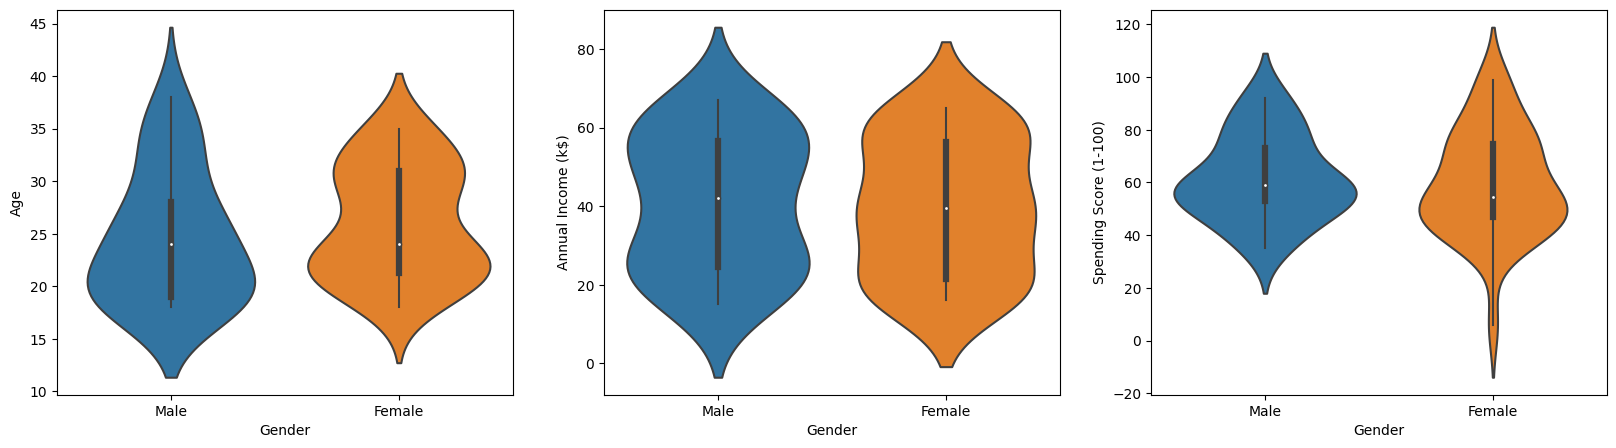

In [48]:
fig, axes = plt.subplots(1,3, figsize=(20,5))

sns.violinplot(x = 'Gender', y = 'Age', data = group_1,ax=axes[0])
sns.violinplot(x = 'Gender', y = 'Annual Income (k$)', data = group_1,ax=axes[1])
sns.violinplot(x = 'Gender', y = 'Spending Score (1-100)', data=group_1,ax=axes[2])
plt.show()

Interpretation:
    
*	Median Age of this cluster are same for both genders.
*	Males earn nearly the same as females.
*	Median Spending Score (1-100) is more for males.


In [49]:
mall_d[['Age', 'Annual Income (k$)','Spending Score (1-100)','Cluster_Id']].groupby('Cluster_Id').mean()

,Age,Annual Income (k$),Spending Score (1-100)
Cluster_Id,,,
0,39.368421,86.500000,19.578947
1,25.438596,40.000000,60.298246
2,53.984615,47.707692,39.969231
3,32.875000,86.100000,81.525000


Cluster 2 are those people whose

* Avg Age : 54
* Avg Annual Income (k$) : 47.7 k
* Avg Spending Score (1-100) : 40


In [50]:
group_2= mall_d[mall_d['Cluster_Id']==2]
group_2.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster_Id
6,7,Female,35,18,6,2
8,9,Male,64,19,3,2
10,11,Male,67,19,14,2
12,13,Female,58,20,15,2
14,15,Male,37,20,13,2


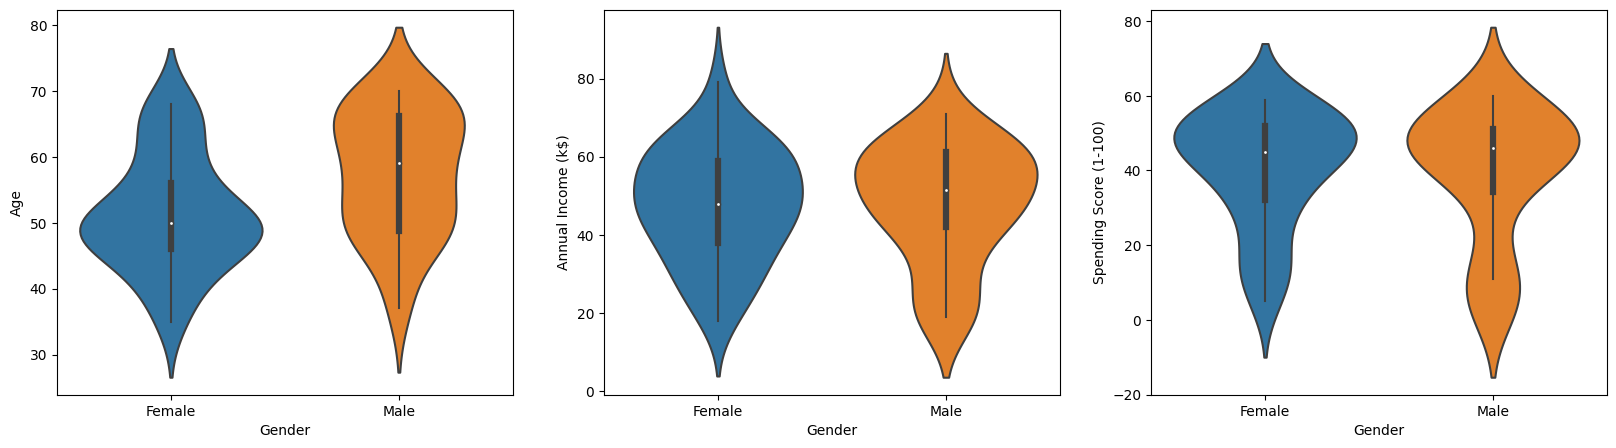

In [51]:
fig, axes = plt.subplots(1,3, figsize=(20,5))

sns.violinplot(x = 'Gender', y = 'Age', data = group_2,ax=axes[0])
sns.violinplot(x = 'Gender', y = 'Annual Income (k$)', data = group_2,ax=axes[1])
sns.violinplot(x = 'Gender', y = 'Spending Score (1-100)', data=group_2,ax=axes[2])
plt.show()

Interpretation:
    
*	Median age of this cluster for Males is more than Females.
*	Males earn more than females.
*	Mean Spending Score (1-100) is the same for both genders.


In [52]:
mall_d[['Age', 'Annual Income (k$)','Spending Score (1-100)','Cluster_Id']].groupby('Cluster_Id').mean()

,Age,Annual Income (k$),Spending Score (1-100)
Cluster_Id,,,
0,39.368421,86.500000,19.578947
1,25.438596,40.000000,60.298246
2,53.984615,47.707692,39.969231
3,32.875000,86.100000,81.525000


Cluster 3 are those people whose

* Avg Age : 32
* Avg Annual Income (k$) : 86.1 k
* Avg Spending Score (1-100) : 81

In [53]:
group_3= mall_d[mall_d['Cluster_Id']==3]
group_3.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster_Id
122,123,Female,40,69,58,3
123,124,Male,39,69,91,3
125,126,Female,31,70,77,3
127,128,Male,40,71,95,3
129,130,Male,38,71,75,3


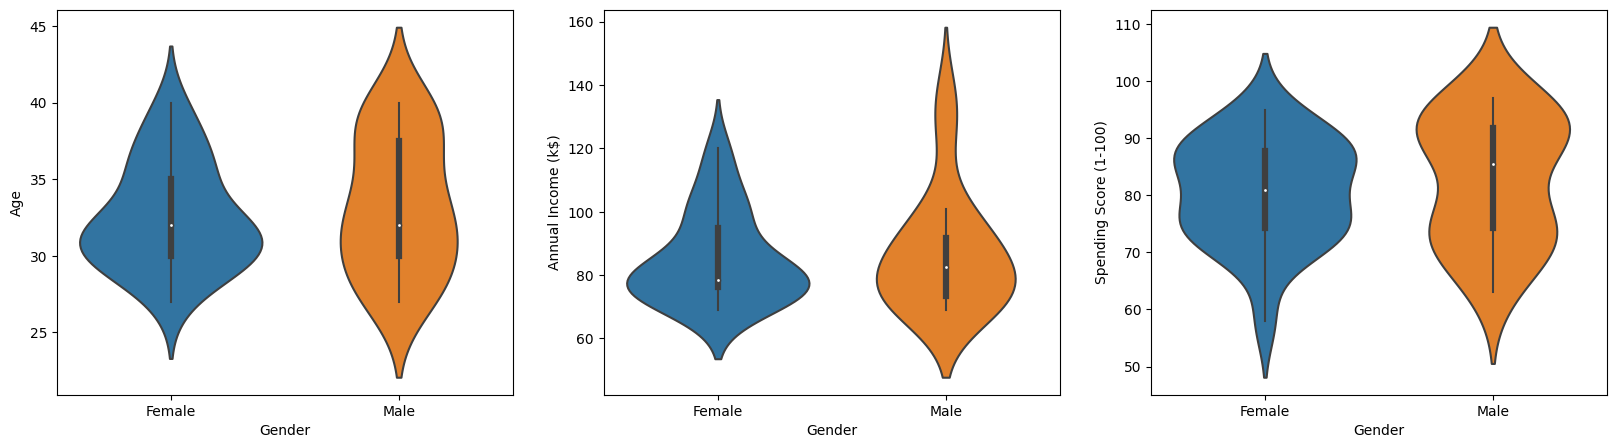

In [54]:
fig, axes = plt.subplots(1,3, figsize=(20,5))

sns.violinplot(x = 'Gender', y = 'Age', data = group_3,ax=axes[0])
sns.violinplot(x = 'Gender', y = 'Annual Income (k$)', data = group_3,ax=axes[1])
sns.violinplot(x = 'Gender', y = 'Spending Score (1-100)', data=group_3,ax=axes[2])
plt.show()

Interpretation:

*	Median age range for males is the same as for females.
*	Males earn more than females.
*	Median Spending Score (1-100) is more for males.


In [55]:
mall_d[['Age', 'Annual Income (k$)','Spending Score (1-100)','Cluster_Id']].groupby('Cluster_Id').mean()

,Age,Annual Income (k$),Spending Score (1-100)
Cluster_Id,,,
0,39.368421,86.500000,19.578947
1,25.438596,40.000000,60.298246
2,53.984615,47.707692,39.969231
3,32.875000,86.100000,81.525000


Final Points-

* Improve the services to attract Cluster 0
* Target Cluster 1 with more offers
* Target Cluster 2 with better employee support
* Reward Cluster 3 people for being a loyal customer


# Hierarchical Clustering

In [56]:
import pandas as pd
df = pd.read_csv("C:\\Users\\Raj Aryan\\Downloads\\Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


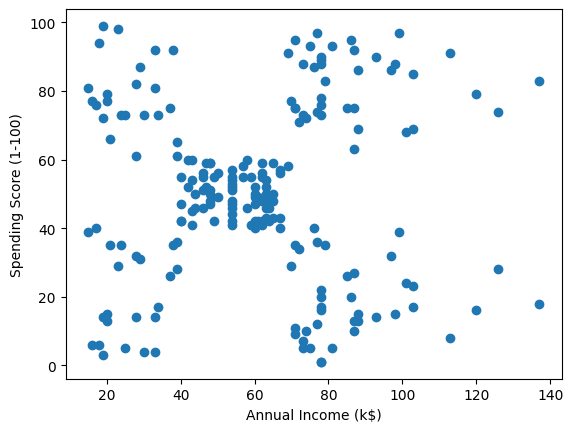

In [57]:
import matplotlib.pyplot as plt

plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

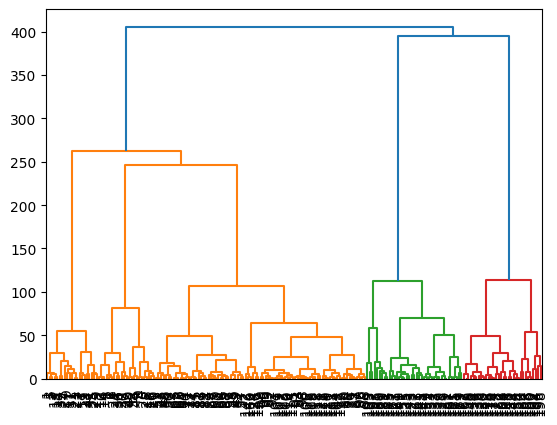

In [58]:
from scipy.cluster.hierarchy import dendrogram, linkage

X = df.iloc[:, 3:].values
Z = linkage(X, 'ward')
dendrogram(Z, leaf_rotation=90, leaf_font_size=10)
plt.show()

In [59]:
from scipy.cluster.hierarchy import fcluster

k = 5
labels = fcluster(Z, k, criterion='maxclust')

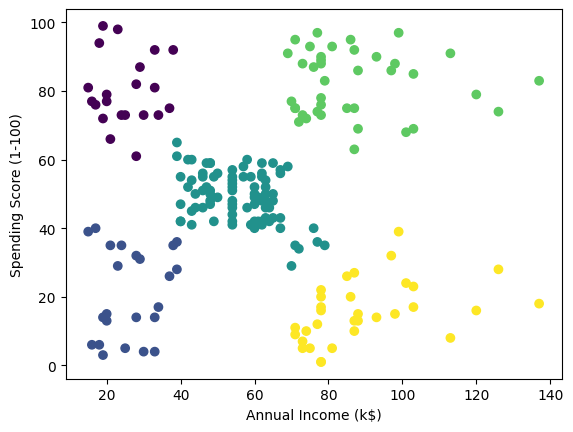

In [60]:
df['Cluster_Id'] = labels
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Cluster_Id'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [61]:
## Number of customers in each cluster
df['Cluster_Id'].value_counts(ascending=True)

1    21
2    23
5    32
4    39
3    85
Name: Cluster_Id, dtype: int64

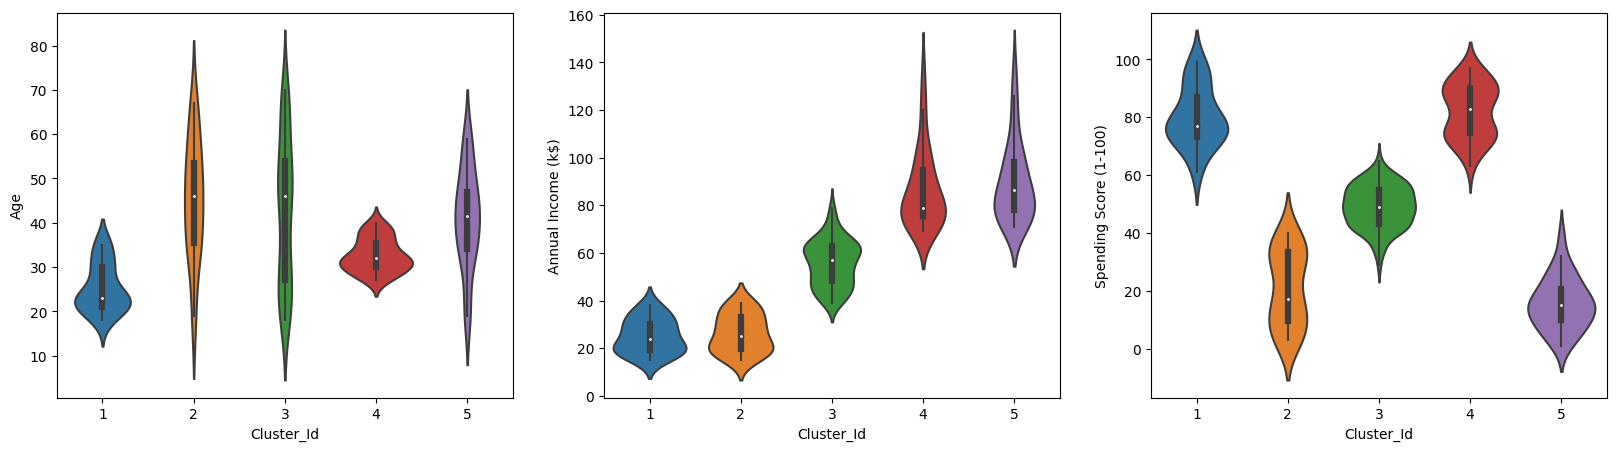

In [62]:
#Violin plot on Original attributes to visualize the spread of the data

fig, axes = plt.subplots(1,3, figsize=(20,5))

sns.violinplot(x = 'Cluster_Id', y = 'Age', data = df,ax=axes[0])
sns.violinplot(x = 'Cluster_Id', y = 'Annual Income (k$)', data = df,ax=axes[1])
sns.violinplot(x = 'Cluster_Id', y = 'Spending Score (1-100)', data=df,ax=axes[2])
plt.show()

In [63]:
df[['Age', 'Annual Income (k$)','Spending Score (1-100)','Cluster_Id']].groupby('Cluster_Id').mean()

,Age,Annual Income (k$),Spending Score (1-100)
Cluster_Id,,,
1,25.333333,25.095238,80.047619
2,45.217391,26.304348,20.913043
3,42.482353,55.811765,49.129412
4,32.692308,86.538462,82.128205
5,41.000000,89.406250,15.593750


In [64]:
group_1= df[df['Cluster_Id']==1]
group_1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster_Id
1,2,Male,21,15,81,1
3,4,Female,23,16,77,1
5,6,Female,22,17,76,1
7,8,Female,23,18,94,1
9,10,Female,30,19,72,1


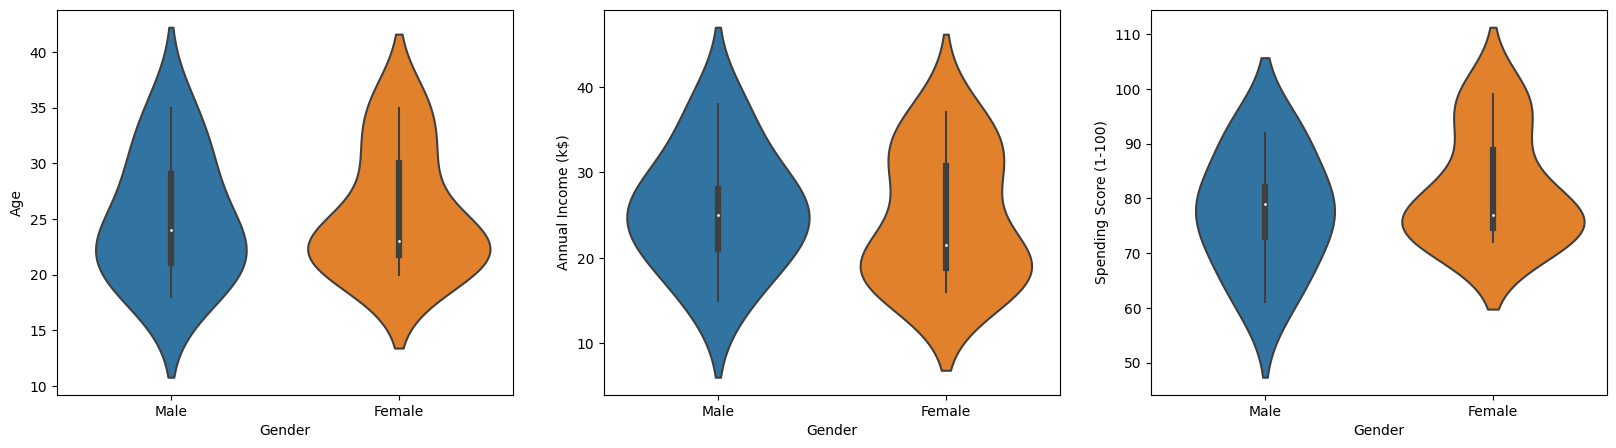

In [65]:
fig, axes = plt.subplots(1,3, figsize=(20,5))

sns.violinplot(x = 'Gender', y = 'Age', data = group_1,ax=axes[0])
sns.violinplot(x = 'Gender', y = 'Annual Income (k$)', data = group_1,ax=axes[1])
sns.violinplot(x = 'Gender', y = 'Spending Score (1-100)', data=group_1,ax=axes[2])
plt.show()

Interpretation:
* Median Age of this cluster are same for both genders.
* Males earn more than females.
* Median Spending Score (1-100) of female is almost same as of males.

In [66]:
group_2= df[df['Cluster_Id']==2]
group_2.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster_Id
0,1,Male,19,15,39,2
2,3,Female,20,16,6,2
4,5,Female,31,17,40,2
6,7,Female,35,18,6,2
8,9,Male,64,19,3,2


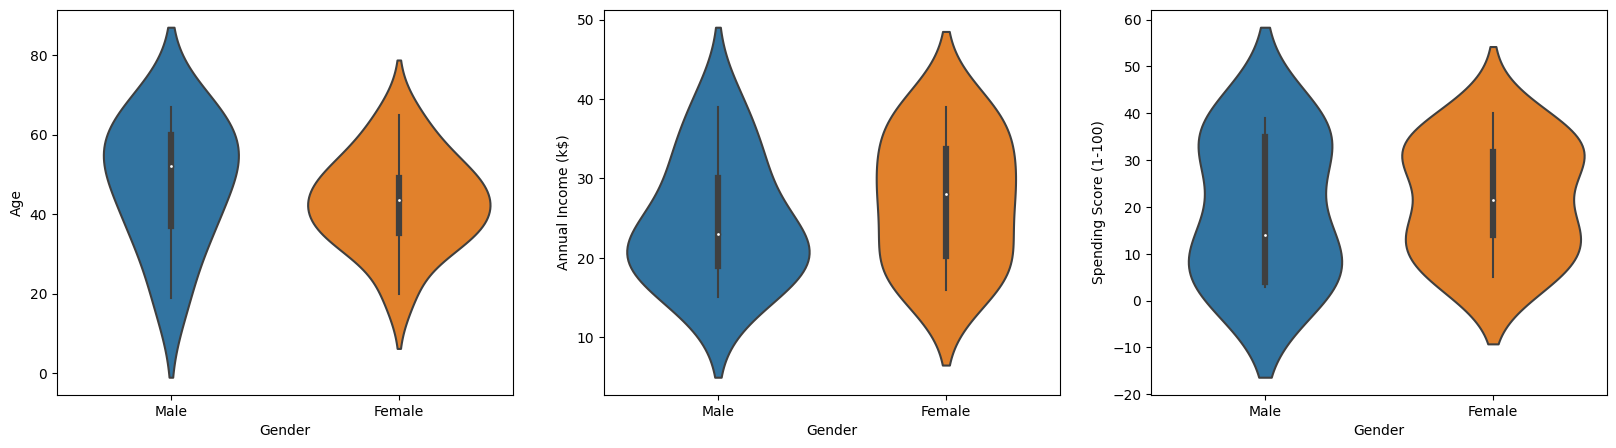

In [67]:
fig, axes = plt.subplots(1,3, figsize=(20,5))

sns.violinplot(x = 'Gender', y = 'Age', data = group_2,ax=axes[0])
sns.violinplot(x = 'Gender', y = 'Annual Income (k$)', data = group_2,ax=axes[1])
sns.violinplot(x = 'Gender', y = 'Spending Score (1-100)', data=group_2,ax=axes[2])
plt.show()

Interpretation:

* Median Age of males in this cluster is more.
* Females earn more than males.
* Median Spending Score (1-100) of female is more than the males.

In [68]:
group_3= df[df['Cluster_Id']==3]
group_3.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster_Id
43,44,Female,31,39,61,3
45,46,Female,24,39,65,3
46,47,Female,50,40,55,3
47,48,Female,27,40,47,3
48,49,Female,29,40,42,3


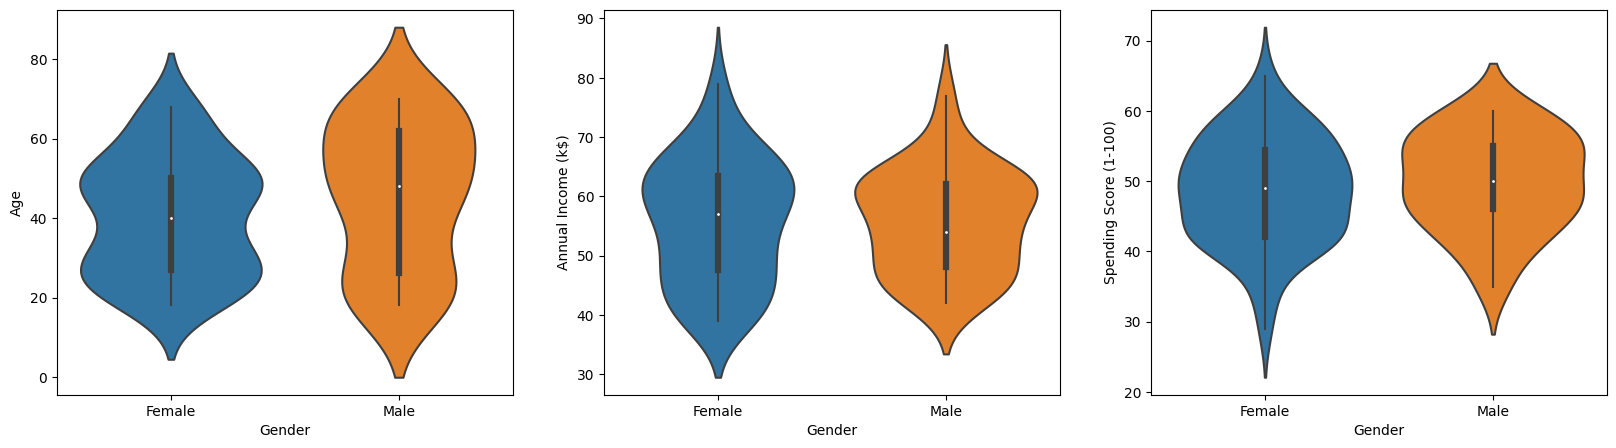

In [69]:
fig, axes = plt.subplots(1,3, figsize=(20,5))

sns.violinplot(x = 'Gender', y = 'Age', data = group_3,ax=axes[0])
sns.violinplot(x = 'Gender', y = 'Annual Income (k$)', data = group_3,ax=axes[1])
sns.violinplot(x = 'Gender', y = 'Spending Score (1-100)', data=group_3,ax=axes[2])
plt.show()

Interpretation:

* Median Age of males in this cluster are more.
* Females earn more than males.
* Median Spending Score (1-100) of female is almost same as of males.

In [70]:
group_4= df[df['Cluster_Id']==4]
group_4.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster_Id
123,124,Male,39,69,91,4
125,126,Female,31,70,77,4
127,128,Male,40,71,95,4
129,130,Male,38,71,75,4
131,132,Male,39,71,75,4


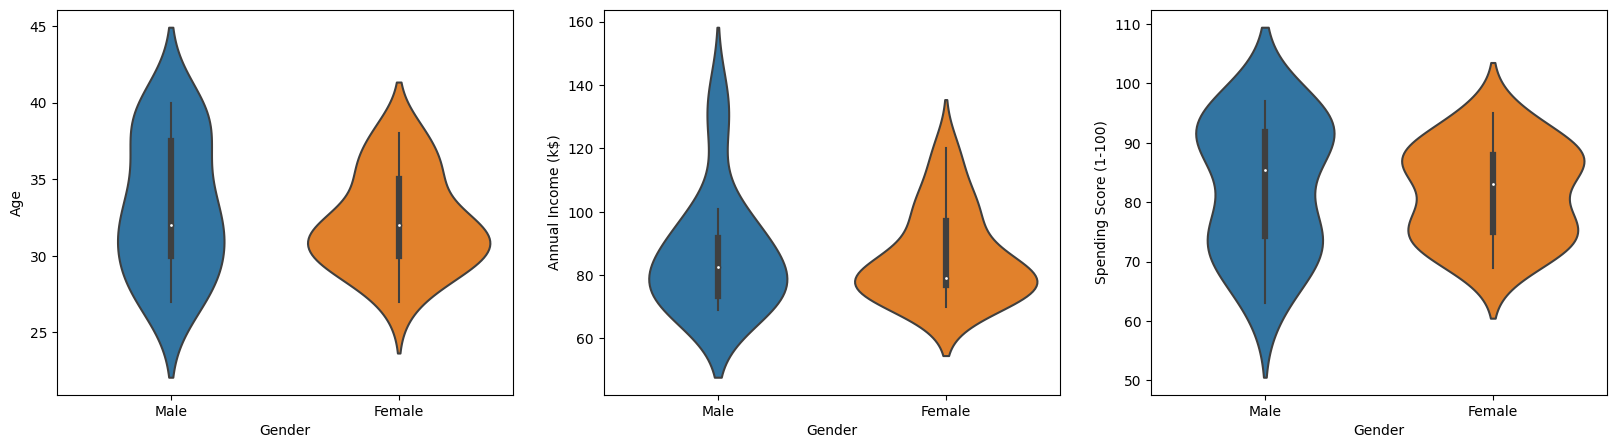

In [71]:
fig, axes = plt.subplots(1,3, figsize=(20,5))

sns.violinplot(x = 'Gender', y = 'Age', data = group_4,ax=axes[0])
sns.violinplot(x = 'Gender', y = 'Annual Income (k$)', data = group_4,ax=axes[1])
sns.violinplot(x = 'Gender', y = 'Spending Score (1-100)', data=group_4,ax=axes[2])
plt.show()

Interpretation:

* Median Age of this cluster is same for both the genders.
* Males earn more than females.
* Median Spending Score (1-100) of female is almost same as of males.

In [72]:
group_5= df[df['Cluster_Id']==5]
group_5.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster_Id
128,129,Male,59,71,11,5
130,131,Male,47,71,9,5
134,135,Male,20,73,5,5
136,137,Female,44,73,7,5
138,139,Male,19,74,10,5


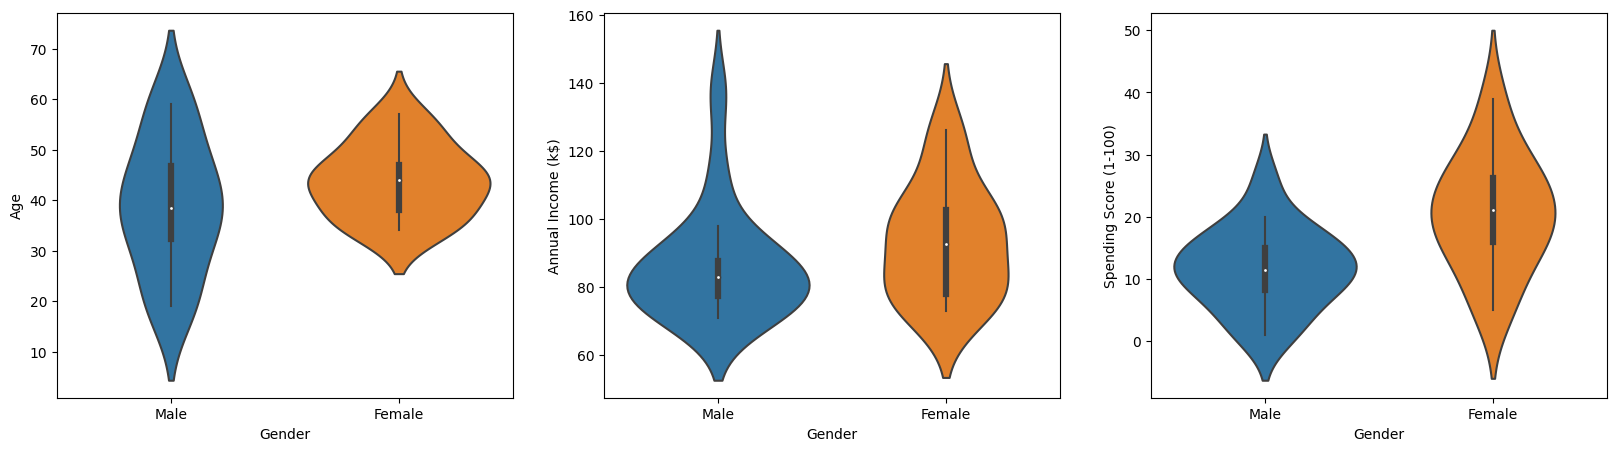

In [73]:
fig, axes = plt.subplots(1,3, figsize=(20,5))

sns.violinplot(x = 'Gender', y = 'Age', data = group_5,ax=axes[0])
sns.violinplot(x = 'Gender', y = 'Annual Income (k$)', data = group_5,ax=axes[1])
sns.violinplot(x = 'Gender', y = 'Spending Score (1-100)', data=group_5,ax=axes[2])
plt.show()

Interpretation:

* Median Age of females in this cluster is more.
* Female earn more than male.
* Median Spending Score (1-100) of female is  more than the males.

# Using psycopg2 to connect database

In [105]:
#Importing required libraries
import psycopg2 as psy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import Point

In [74]:
mall

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15.99,39
1,21,15.99,81
2,20,16.00,6
3,23,16.00,77
4,31,17.00,40
...,...,...,...
195,35,120.00,79
196,45,126.00,28
197,32,126.00,74
198,32,126.11,18


In [75]:
mall=pd.read_csv("C:\\Users\\Raj Aryan\\Downloads\\Mall_Customers.csv")
mall.index

RangeIndex(start=0, stop=200, step=1)

In [76]:
import psycopg2 as psy
conn=psy.connect(database='DSSA35',user='postgres',password='6725')
cursor=conn.cursor()
cursor.execute("drop table if exists customer_data")
cursor.execute('create table customer_data(CustomerID int, Gender text, Age int, AnnualIncome int, SpendingScore int)')

for i in mall.index:
    v=[mall.at[i,col] for col in list(mall.columns)]
    print(v)
    q="insert into customer_data values('%s','%s','%s','%s','%s')" %(v[0],v[1],v[2],v[3],v[4])
    cursor.execute(q)
conn.commit()  

print('values inserted')

[1, 'Male', 19, 15, 39]
[2, 'Male', 21, 15, 81]
[3, 'Female', 20, 16, 6]
[4, 'Female', 23, 16, 77]
[5, 'Female', 31, 17, 40]
[6, 'Female', 22, 17, 76]
[7, 'Female', 35, 18, 6]
[8, 'Female', 23, 18, 94]
[9, 'Male', 64, 19, 3]
[10, 'Female', 30, 19, 72]
[11, 'Male', 67, 19, 14]
[12, 'Female', 35, 19, 99]
[13, 'Female', 58, 20, 15]
[14, 'Female', 24, 20, 77]
[15, 'Male', 37, 20, 13]
[16, 'Male', 22, 20, 79]
[17, 'Female', 35, 21, 35]
[18, 'Male', 20, 21, 66]
[19, 'Male', 52, 23, 29]
[20, 'Female', 35, 23, 98]
[21, 'Male', 35, 24, 35]
[22, 'Male', 25, 24, 73]
[23, 'Female', 46, 25, 5]
[24, 'Male', 31, 25, 73]
[25, 'Female', 54, 28, 14]
[26, 'Male', 29, 28, 82]
[27, 'Female', 45, 28, 32]
[28, 'Male', 35, 28, 61]
[29, 'Female', 40, 29, 31]
[30, 'Female', 23, 29, 87]
[31, 'Male', 60, 30, 4]
[32, 'Female', 21, 30, 73]
[33, 'Male', 53, 33, 4]
[34, 'Male', 18, 33, 92]
[35, 'Female', 49, 33, 14]
[36, 'Female', 21, 33, 81]
[37, 'Female', 42, 34, 17]
[38, 'Female', 30, 34, 73]
[39, 'Female', 36, 37

In [77]:
m="select * from customer_data"
cursor.execute(m)
print(cursor.fetchall())
cursor.close()

[(1, 'Male', 19, 15, 39), (2, 'Male', 21, 15, 81), (3, 'Female', 20, 16, 6), (4, 'Female', 23, 16, 77), (5, 'Female', 31, 17, 40), (6, 'Female', 22, 17, 76), (7, 'Female', 35, 18, 6), (8, 'Female', 23, 18, 94), (9, 'Male', 64, 19, 3), (10, 'Female', 30, 19, 72), (11, 'Male', 67, 19, 14), (12, 'Female', 35, 19, 99), (13, 'Female', 58, 20, 15), (14, 'Female', 24, 20, 77), (15, 'Male', 37, 20, 13), (16, 'Male', 22, 20, 79), (17, 'Female', 35, 21, 35), (18, 'Male', 20, 21, 66), (19, 'Male', 52, 23, 29), (20, 'Female', 35, 23, 98), (21, 'Male', 35, 24, 35), (22, 'Male', 25, 24, 73), (23, 'Female', 46, 25, 5), (24, 'Male', 31, 25, 73), (25, 'Female', 54, 28, 14), (26, 'Male', 29, 28, 82), (27, 'Female', 45, 28, 32), (28, 'Male', 35, 28, 61), (29, 'Female', 40, 29, 31), (30, 'Female', 23, 29, 87), (31, 'Male', 60, 30, 4), (32, 'Female', 21, 30, 73), (33, 'Male', 53, 33, 4), (34, 'Male', 18, 33, 92), (35, 'Female', 49, 33, 14), (36, 'Female', 21, 33, 81), (37, 'Female', 42, 34, 17), (38, 'Fema

In [83]:
#Reading the csv file into dataframe
df=pd.read_csv("C:\\Users\\Raj Aryan\\Desktop\\Mall_Customers_loc.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Address,Latitude,Longitude
0,1,Male,19,15,39,Model colony,18.5325,73.8375
1,2,Male,21,15,81,Koregaon Park,18.5362,73.8940
2,3,Female,20,16,6,Kothrud,18.5074,73.8077
3,4,Female,23,16,77,Viman Nagar,18.5679,73.9143
4,5,Female,31,17,40,Anand Nagar,18.4740,73.8220
...,...,...,...,...,...,...,...,...
195,196,Female,35,120,79,Bhosari,18.6321,73.8468
196,197,Female,45,126,28,Pashan,18.5415,73.7925
197,198,Male,32,126,74,Shivajinagar,18.5314,73.8446
198,199,Male,32,137,18,Anand Nagar,18.4740,73.8220


In [85]:
#Converting the cordinates (Latitude, longitude) to point geometry type
geometry = [Point(xy) for xy in zip(df.Longitude, df.Latitude)]
gdf = gpd.GeoDataFrame(df, crs="EPSG:4326", geometry=geometry)
gdf.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Address,Latitude,Longitude,geometry
0,1,Male,19,15,39,Model colony,18.5325,73.8375,POINT (73.83750 18.53250)
1,2,Male,21,15,81,Koregaon Park,18.5362,73.8940,POINT (73.89400 18.53620)
2,3,Female,20,16,6,Kothrud,18.5074,73.8077,POINT (73.80770 18.50740)
3,4,Female,23,16,77,Viman Nagar,18.5679,73.9143,POINT (73.91430 18.56790)
4,5,Female,31,17,40,Anand Nagar,18.4740,73.8220,POINT (73.82200 18.47400)


<AxesSubplot: >

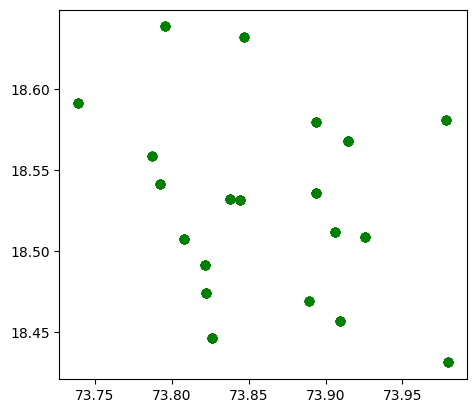

In [86]:
#Plotting the points obtained for different locations
gdf.plot(marker='o', color='green')

In [103]:
#Importing the pune shape file
pune=gpd.read_file("C:\\Users\\Raj Aryan\\Desktop\\pune_shp")
pune

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2,Shape_Leng,Shape_Area,geometry
0,105,IND,India,21,Maharashtra,319,Pune,District,District,NaN,Poona,8.752413,1.335277,"POLYGON ((73.86498 19.35889, 73.87045 19.35802..."


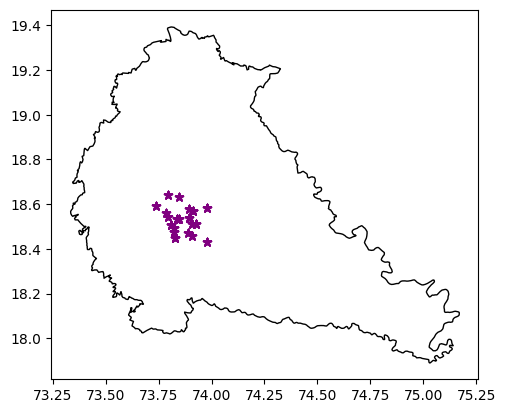

In [104]:
#Plotting the points on the map of pune
base = pune.plot(color='white', edgecolor='black')
gdf.plot(ax=base, marker='*', color='purple');